In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
BINARY_DIRECTORY = '/Users/lamprinikourou/Documents/ThesisData/binary/'

# Binary

In [7]:
df_train_list = []
df_test_list = []
for csv_file in os.listdir(BINARY_DIRECTORY):
    d = pd.read_csv(BINARY_DIRECTORY+csv_file)
    df_train_list.append(d[:int(0.8*len(d) )])
    df_test_list.append(d[int(0.8*len(d) ):])
df_train = pd.concat(df_train_list).sample(frac=1)
df_test = pd.concat(df_test_list).sample(frac=1)
del df_train_list
del df_test_list

In [8]:
len(df_train), len(df_test)

(1126572, 281647)

In [9]:
X_columns = [c for c in df_train.columns if c not in ['label', 'category', 'specific_class']]
y_column_label = 'label'
y_column_category = 'category'
y_column_specific_class = 'specific_class'

In [10]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [12]:
rf2 = RandomForestClassifier(n_jobs=-1)
rf3 = RandomForestClassifier(n_jobs=-1)
rf6 = RandomForestClassifier(n_jobs=-1)


AB2 = AdaBoostClassifier()
AB3 = AdaBoostClassifier()
AB6 = AdaBoostClassifier()


LR2 = LogisticRegression()
LR3 = LogisticRegression()
LR6 = LogisticRegression()


DNN2 = MLPClassifier(hidden_layer_sizes=(16,16,16,16))
DNN3 = MLPClassifier(hidden_layer_sizes=(16,16,16,16))
DNN6 = MLPClassifier(hidden_layer_sizes=(16,16,16,16))



In [13]:
%time rf2.fit(df_train[X_columns], df_train[y_column_label])
%time rf3.fit(df_train[X_columns], df_train[y_column_category])
%time rf6.fit(df_train[X_columns], df_train[y_column_specific_class])


%time AB2.fit(df_train[X_columns], df_train[y_column_label])
%time AB3.fit(df_train[X_columns], df_train[y_column_category])
%time AB6.fit(df_train[X_columns], df_train[y_column_specific_class])


%time LR2.fit(df_train[X_columns], df_train[y_column_label])
%time LR3.fit(df_train[X_columns], df_train[y_column_category])
%time LR6.fit(df_train[X_columns], df_train[y_column_specific_class])


%time DNN2.fit(df_train[X_columns], df_train[y_column_label])
%time DNN3.fit(df_train[X_columns], df_train[y_column_category])
%time DNN6.fit(df_train[X_columns], df_train[y_column_specific_class])

CPU times: user 1min 32s, sys: 2.98 s, total: 1min 35s
Wall time: 15.8 s
CPU times: user 1min 34s, sys: 2.55 s, total: 1min 37s
Wall time: 14.7 s
CPU times: user 1min 36s, sys: 2.46 s, total: 1min 38s
Wall time: 14.8 s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: user 1min 29s, sys: 20.4 s, total: 1min 49s
Wall time: 1min 58s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: user 1min 30s, sys: 23.3 s, total: 1min 53s
Wall time: 2min 4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: user 1min 34s, sys: 24.9 s, total: 1min 58s
Wall time: 2min 10s
CPU times: user 18.6 s, sys: 1.95 s, total: 20.5 s
Wall time: 5.27 s
CPU times: user 32.7 s, sys: 6.08 s, total: 38.8 s
Wall time: 7.69 s
CPU times: user 1min 11s, sys: 19.1 s, total: 1min 30s
Wall time: 16 s
CPU times: user 7min 17s, sys: 11.2 s, total: 7min 28s
Wall time: 1min 2s
CPU times: user 7min 16s, sys: 11.7 s, total: 7min 28s
Wall time: 1min 2s
CPU times: user 6min 30s, sys: 6.42 s, total: 6min 36s
Wall time: 53.3 s


MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16))

In [14]:
pred_rf2 = rf2.predict(df_test[X_columns])
pred_rf3 = rf3.predict(df_test[X_columns])
pred_rf6 = rf6.predict(df_test[X_columns])


pred_AB2 = AB2.predict(df_test[X_columns])
pred_AB3 = AB3.predict(df_test[X_columns])
pred_AB6 = AB6.predict(df_test[X_columns])


pred_LR2 = LR2.predict(df_test[X_columns])
pred_LR3 = LR3.predict(df_test[X_columns])
pred_LR6 = LR6.predict(df_test[X_columns])


pred_DNN2 = DNN2.predict(df_test[X_columns])
pred_DNN3 = DNN3.predict(df_test[X_columns])
pred_DNN6 = DNN6.predict(df_test[X_columns])

In [15]:
rf2_acc = accuracy_score(df_test[y_column_label], pred_rf2)
rf2_rcc = recall_score(df_test[y_column_label], pred_rf2, average='macro')
rf2_pre = precision_score(df_test[y_column_label], pred_rf2, average='macro')
rf2_f1 = f1_score(df_test[y_column_label], pred_rf2, average='macro')

rf3_acc = accuracy_score(df_test[y_column_category], pred_rf3)
rf3_rcc = recall_score(df_test[y_column_category], pred_rf3, average='macro')
rf3_pre = precision_score(df_test[y_column_category], pred_rf3, average='macro')
rf3_f1 = f1_score(df_test[y_column_category], pred_rf3, average='macro')

rf6_acc = accuracy_score(df_test[y_column_specific_class], pred_rf6)
rf6_rcc = recall_score(df_test[y_column_specific_class], pred_rf6, average='macro')
rf6_pre = precision_score(df_test[y_column_specific_class], pred_rf6, average='macro')
rf6_f1 = f1_score(df_test[y_column_specific_class], pred_rf6, average='macro')

In [16]:
AB2_acc = accuracy_score(df_test[y_column_label], pred_AB2)
AB2_rcc = recall_score(df_test[y_column_label], pred_AB2, average='macro')
AB2_pre = precision_score(df_test[y_column_label], pred_AB2, average='macro')
AB2_f1 = f1_score(df_test[y_column_label], pred_AB2, average='macro')

AB3_acc = accuracy_score(df_test[y_column_category], pred_AB3)
AB3_rcc = recall_score(df_test[y_column_category], pred_AB3, average='macro')
AB3_pre = precision_score(df_test[y_column_category], pred_AB3, average='macro')
AB3_f1 = f1_score(df_test[y_column_category], pred_AB3, average='macro')

AB6_acc = accuracy_score(df_test[y_column_specific_class], pred_AB6)
AB6_rcc = recall_score(df_test[y_column_specific_class], pred_AB6, average='macro')
AB6_pre = precision_score(df_test[y_column_specific_class], pred_AB6, average='macro')
AB6_f1 = f1_score(df_test[y_column_specific_class], pred_AB6, average='macro')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
LR2_acc = accuracy_score(df_test[y_column_label], pred_LR2)
LR2_rcc = recall_score(df_test[y_column_label], pred_LR2, average='macro')
LR2_pre = precision_score(df_test[y_column_label], pred_LR2, average='macro')
LR2_f1 = f1_score(df_test[y_column_label], pred_LR2, average='macro')

LR3_acc = accuracy_score(df_test[y_column_category], pred_LR3)
LR3_rcc = recall_score(df_test[y_column_category], pred_LR3, average='macro')
LR3_pre = precision_score(df_test[y_column_category], pred_LR3, average='macro')
LR3_f1 = f1_score(df_test[y_column_category], pred_LR3, average='macro')

LR6_acc = accuracy_score(df_test[y_column_specific_class], pred_LR6)
LR6_rcc = recall_score(df_test[y_column_specific_class], pred_LR6, average='macro')
LR6_pre = precision_score(df_test[y_column_specific_class], pred_LR6, average='macro')
LR6_f1 = f1_score(df_test[y_column_specific_class], pred_LR6, average='macro')

In [18]:
DNN2_acc = accuracy_score(df_test[y_column_label], pred_DNN2)
DNN2_rcc = recall_score(df_test[y_column_label], pred_DNN2, average='macro')
DNN2_pre = precision_score(df_test[y_column_label], pred_DNN2, average='macro')
DNN2_f1 = f1_score(df_test[y_column_label], pred_DNN2, average='macro')

DNN3_acc = accuracy_score(df_test[y_column_category], pred_DNN3)
DNN3_rcc = recall_score(df_test[y_column_category], pred_DNN3, average='macro')
DNN3_pre = precision_score(df_test[y_column_category], pred_DNN3, average='macro')
DNN3_f1 = f1_score(df_test[y_column_category], pred_DNN3, average='macro')

DNN6_acc = accuracy_score(df_test[y_column_specific_class], pred_DNN6)
DNN6_rcc = recall_score(df_test[y_column_specific_class], pred_DNN6, average='macro')
DNN6_pre = precision_score(df_test[y_column_specific_class], pred_DNN6, average='macro')
DNN6_f1 = f1_score(df_test[y_column_specific_class], pred_DNN6, average='macro')

In [19]:
print('##### Random Forest #####')
print('2')
print('accuracy = ', rf2_acc)
print('recall = ', rf2_rcc)
print('precision = ', rf2_pre)
print('F1_score = ', rf2_f1)
print()
print('3')
print('##### Random Forest #####')
print('accuracy = ', rf3_acc)
print('recall = ', rf3_rcc)
print('precision = ', rf3_pre)
print('F1_score = ', rf3_f1)
print()
print('6')
print('##### Random Forest #####')
print('accuracy = ', rf6_acc)
print('recall = ', rf6_rcc)
print('precision = ', rf6_pre)
print('F1_score = ', rf6_f1)

##### Random Forest #####
2
accuracy =  1.0
recall =  1.0
precision =  1.0
F1_score =  1.0

3
##### Random Forest #####
accuracy =  0.9822863371525349
recall =  0.9242920877720113
precision =  0.9933409947264522
F1_score =  0.9539334667042164

6
##### Random Forest #####
accuracy =  0.9468519103700732
recall =  0.681912567089492
precision =  0.9009117931860281
F1_score =  0.6272238710602495


In [20]:
print('##### AdaBoost #####')
print('2')
print('accuracy = ', AB2_acc)
print('recall = ', AB2_rcc)
print('precision = ', AB2_pre)
print('F1_score = ', AB2_f1)
print()
print('3')
print('##### AdaBoost #####')
print('accuracy = ', AB3_acc)
print('recall = ', AB3_rcc)
print('precision = ', AB3_pre)
print('F1_score = ', AB3_f1)
print()
print('6')
print('##### AdaBoost #####')
print('accuracy = ', AB6_acc)
print('recall = ', AB6_rcc)
print('precision = ', AB6_pre)
print('F1_score = ', AB6_f1)

##### AdaBoost #####
2
accuracy =  1.0
recall =  1.0
precision =  1.0
F1_score =  1.0

3
##### AdaBoost #####
accuracy =  0.6726931229517801
recall =  0.25803683789040155
precision =  0.2789968236577856
F1_score =  0.26810780520007044

6
##### AdaBoost #####
accuracy =  0.7775513319864937
recall =  0.30537576488182516
precision =  0.19516987346574077
F1_score =  0.21497625437887394


In [21]:
print('##### LogisticRegression #####')
print('2')
print('accuracy = ', LR2_acc)
print('recall = ', LR2_rcc)
print('precision = ', LR2_pre)
print('F1_score = ', LR2_f1)
print()
print('3')
print('##### LogisticRegression #####')
print('accuracy = ', LR3_acc)
print('recall = ', LR3_rcc)
print('precision = ', LR3_pre)
print('F1_score = ', LR3_f1)
print()
print('6')
print('##### LogisticRegression #####')
print('accuracy = ', LR6_acc)
print('recall = ', LR6_rcc)
print('precision = ', LR6_pre)
print('F1_score = ', LR6_f1)

##### LogisticRegression #####
2
accuracy =  0.9822614833461745
recall =  0.9323016883926394
precision =  0.9899977577038888
F1_score =  0.9586412669386091

3
##### LogisticRegression #####
accuracy =  0.9822614833461745
recall =  0.9241787160409397
precision =  0.9933318384692592
F1_score =  0.9538596889124177

6
##### LogisticRegression #####
accuracy =  0.9468270565637127
recall =  0.6817838021833372
precision =  0.7374961158661835
F1_score =  0.6286518417581622


In [22]:
print('##### DNN #####')
print('2')
print('accuracy = ', DNN2_acc)
print('recall = ', DNN2_rcc)
print('precision = ', DNN2_pre)
print('F1_score = ', DNN2_f1)
print()
print('3')
print('##### DNN #####')
print('accuracy = ', DNN3_acc)
print('recall = ', DNN3_rcc)
print('precision = ', DNN3_pre)
print('F1_score = ', DNN3_f1)
print()
print('6')
print('##### DNN #####')
print('accuracy = ', DNN6_acc)
print('recall = ', DNN6_rcc)
print('precision = ', DNN6_pre)
print('F1_score = ', DNN6_f1)

##### DNN #####
2
accuracy =  1.0
recall =  1.0
precision =  1.0
F1_score =  1.0

3
##### DNN #####
accuracy =  1.0
recall =  1.0
precision =  1.0
F1_score =  1.0

6
##### DNN #####
accuracy =  0.9468341576512442
recall =  0.6818366715217933
precision =  0.7143695310835186
F1_score =  0.6018580535324812


In [23]:
color_lr = 'lightgray'
color_pc = 'chocolate'
color_ab = 'rosybrown'
color_dnn = 'orange'
color_rf = 'royalblue'


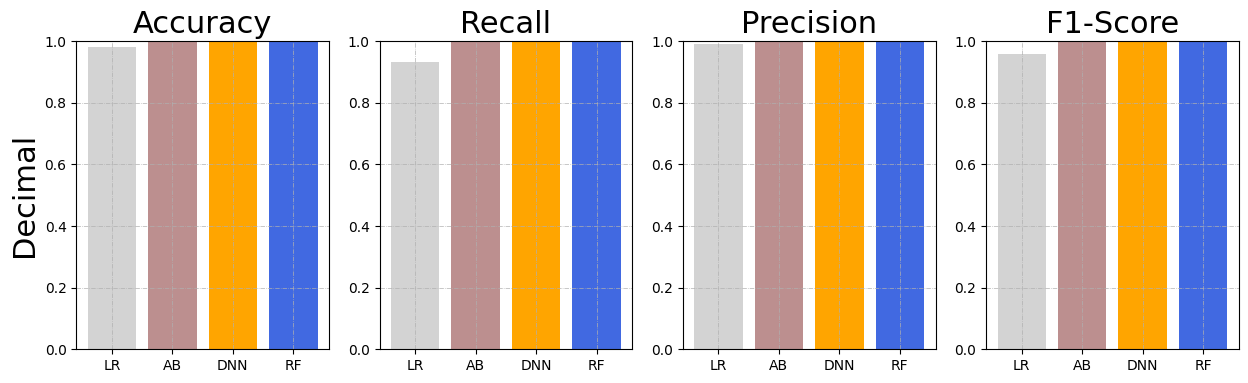

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



fig, axs = plt.subplots(1, 4, figsize=(15,4))

# acc2
axs[0].bar(['LR','AB','DNN', 'RF'],[LR2_acc,AB2_acc,DNN2_acc,rf2_acc], color=[color_lr, color_ab, color_dnn, color_rf])
axs[0].set_title("Accuracy", fontsize=22)
axs[0].set_ylabel("Decimal", fontsize=22)
axs[0].set_ylim(0,1)
# rcc2
axs[1].bar(['LR','AB','DNN', 'RF'],[LR2_rcc,AB2_rcc,DNN2_rcc,rf2_rcc], color=[color_lr, color_ab, color_dnn, color_rf])
axs[1].set_title("Recall", fontsize=22)
# axs[1].set_ylabel("Recall", fontsize=22)
axs[1].set_ylim(0,1)
# pre2
axs[2].bar(['LR','AB','DNN', 'RF'],[LR2_pre,AB2_pre,DNN2_pre,rf2_pre], color=[color_lr, color_ab, color_dnn, color_rf])
axs[2].set_title("Precision", fontsize=22)
# axs[2].set_ylabel("Precision", fontsize=22)
axs[2].set_ylim(0,1)
# f12
axs[3].bar(['LR','AB','DNN', 'RF'],[LR2_f1,AB2_f1,DNN2_f1,rf2_f1], color=[color_lr, color_ab, color_dnn, color_rf])
axs[3].set_title("F1-Score", fontsize=22)
# axs[3].set_ylabel("F1-Score", fontsize=22)
axs[3].set_ylim(0,1)




legend_elements = [Patch(facecolor=color_lr, label='LogisticRegression'),
                   Patch(facecolor=color_ab, label='AdaBoost'),
                   Patch(facecolor=color_dnn, label='DeepNeuralNetwork'),
                   Patch(facecolor=color_rf, label='RandomForest')]

# Create the figure
# fig.legend(handles=legend_elements, fontsize=12)
axs[0].grid(linestyle='-.', linewidth=.5)
axs[1].grid(linestyle='-.', linewidth=.5)
axs[2].grid(linestyle='-.', linewidth=.5)
axs[3].grid(linestyle='-.', linewidth=.5)

# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center')

plt.show()

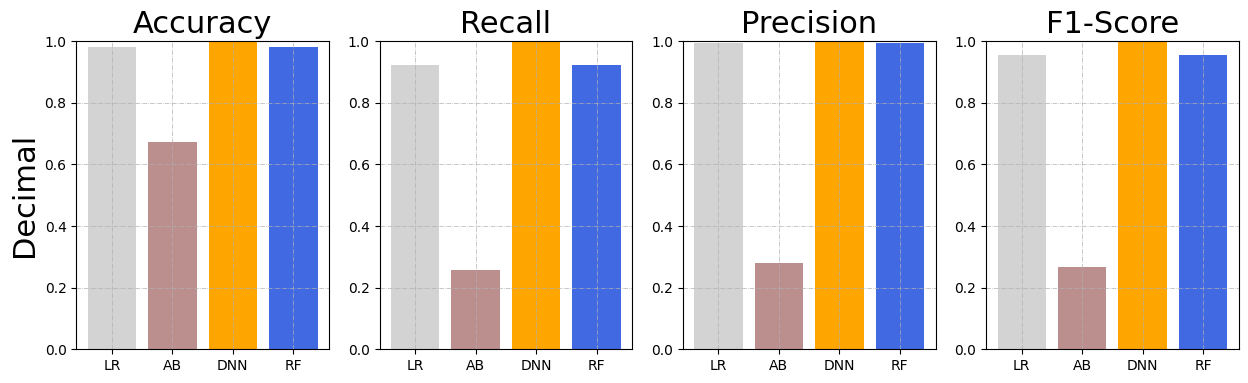

In [26]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



fig, axs = plt.subplots(1, 4, figsize=(15,4))

# acc2
axs[0].bar(['LR','AB','DNN', 'RF'],[LR3_acc,AB3_acc,DNN3_acc,rf3_acc], color=[color_lr, color_ab, color_dnn, color_rf])
axs[0].set_title("Accuracy", fontsize=22)
axs[0].set_ylabel("Decimal", fontsize=22)
axs[0].set_ylim(0,1)
# rcc2
axs[1].bar(['LR','AB','DNN', 'RF'],[LR3_rcc,AB3_rcc,DNN3_rcc,rf3_rcc], color=[color_lr, color_ab, color_dnn, color_rf])
axs[1].set_title("Recall", fontsize=22)
# axs[1].set_ylabel("Recall", fontsize=22)
axs[1].set_ylim(0,1)
# pre2
axs[2].bar(['LR','AB','DNN', 'RF'],[LR3_pre,AB3_pre,DNN3_pre,rf3_pre], color=[color_lr, color_ab, color_dnn, color_rf])
axs[2].set_title("Precision", fontsize=22)
# axs[2].set_ylabel("Precision", fontsize=22)
axs[2].set_ylim(0,1)
# f12
axs[3].bar(['LR','AB','DNN', 'RF'],[LR3_f1,AB3_f1,DNN3_f1,rf3_f1], color=[color_lr, color_ab, color_dnn, color_rf])
axs[3].set_title("F1-Score", fontsize=22)
# axs[3].set_ylabel("F1-Score", fontsize=22)
axs[3].set_ylim(0,1)




legend_elements = [Patch(facecolor=color_lr, label='LogisticRegression'),
                   Patch(facecolor=color_ab, label='AdaBoost'),
                   Patch(facecolor=color_dnn, label='DeepNeuralNetwork'),
                   Patch(facecolor=color_rf, label='RandomForest')]

# Create the figure
# fig.legend(handles=legend_elements, fontsize=12)
axs[0].grid(linestyle='-.', linewidth=.5)
axs[1].grid(linestyle='-.', linewidth=.5)
axs[2].grid(linestyle='-.', linewidth=.5)
axs[3].grid(linestyle='-.', linewidth=.5)

# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center')

plt.show()

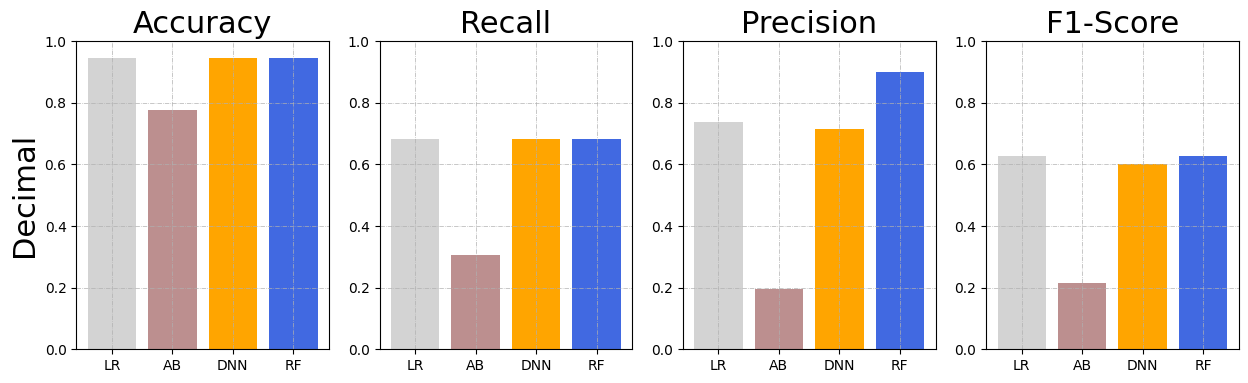

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



fig, axs = plt.subplots(1, 4, figsize=(15,4))

# acc2
axs[0].bar(['LR','AB','DNN', 'RF'],[LR6_acc,AB6_acc,DNN6_acc,rf6_acc], color=[color_lr, color_ab, color_dnn, color_rf])
axs[0].set_title("Accuracy", fontsize=22)
axs[0].set_ylabel("Decimal", fontsize=22)
axs[0].set_ylim(0,1)
# rcc2
axs[1].bar(['LR','AB','DNN', 'RF'],[LR6_rcc,AB6_rcc,DNN6_rcc,rf6_rcc], color=[color_lr, color_ab, color_dnn, color_rf])
axs[1].set_title("Recall", fontsize=22)
# axs[1].set_ylabel("Recall", fontsize=22)
axs[1].set_ylim(0,1)
# pre2
axs[2].bar(['LR','AB','DNN', 'RF'],[LR6_pre,AB6_pre,DNN6_pre,rf6_pre], color=[color_lr, color_ab, color_dnn, color_rf])
axs[2].set_title("Precision", fontsize=22)
# axs[2].set_ylabel("Precision", fontsize=22)
axs[2].set_ylim(0,1)
# f12
axs[3].bar(['LR','AB','DNN', 'RF'],[LR6_f1,AB6_f1,DNN6_f1,rf6_f1], color=[color_lr, color_ab, color_dnn, color_rf])
axs[3].set_title("F1-Score", fontsize=22)
# axs[3].set_ylabel("F1-Score", fontsize=22)
axs[3].set_ylim(0,1)




legend_elements = [Patch(facecolor=color_lr, label='LogisticRegression'),
                   Patch(facecolor=color_ab, label='AdaBoost'),
                   Patch(facecolor=color_dnn, label='DeepNeuralNetwork'),
                   Patch(facecolor=color_rf, label='RandomForest')]

# Create the figure
# fig.legend(handles=legend_elements, fontsize=12)
axs[0].grid(linestyle='-.', linewidth=.5)
axs[1].grid(linestyle='-.', linewidth=.5)
axs[2].grid(linestyle='-.', linewidth=.5)
axs[3].grid(linestyle='-.', linewidth=.5)

# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center')

plt.show()